In [4]:
from random import seed
from random import random
import numpy as np 
import matplotlib.pyplot as plt
from scipy import signal
import pylab
import math
import seaborn as sns

In [15]:
class Automatos:
    def __init__(self, matriz, symbols):
        self.matriz = np.array(matriz)
        self.symb = symbols
    def deterministic(self, inter):
        p = []
        i = 0
        for k in range(inter):
            r = random()
            a = 0
            for j in range(len(self.matriz)):
                a = a + self.matriz[i][j]
                if r < a:
                    p.append(self.symb[i])
                    i = j
                    break
        return p
M = [[0.5,0.5,0,0],
    [0,0.1,0.9,0],
    [0,0,0.6,0.4],
    [0.7,0,0,0.3]
    ] 
auto = Automatos(M, [0,1,2,3])
padroes_fig2 = auto.deterministic(200)
print(padroes_fig2)

[0, 1, 2, 2, 3, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 1, 2, 2, 2, 2, 2, 3, 0, 1, 1, 2, 3, 0, 0, 1, 2, 3, 0, 0, 0, 1, 2, 2, 3, 0, 1, 2, 2, 2, 3, 0, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 0, 0, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 0, 1, 2, 2, 2, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 3, 3, 0, 1, 2, 3, 0, 1, 2, 2, 3, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 3, 0, 1, 2, 3, 0, 1, 2, 2, 2, 3, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 0, 1, 2, 2, 3, 0, 1, 2, 2, 2, 2, 2, 3, 3, 0, 1, 2, 2, 3, 0, 0, 1, 2, 2, 2, 3, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 3, 3, 0, 1, 2, 3, 3, 0, 1, 2, 2, 3, 3, 0, 0, 1, 2, 2, 3, 0]


In [6]:
#from numpy import arange
#plt.title("Bar Plot")
#plt.step(arange(0,len(padroes_fig2)),padroes_fig2, color = 'darkblue')
#plt.xlim(0,len(padroes_fig2))
#plt.show()

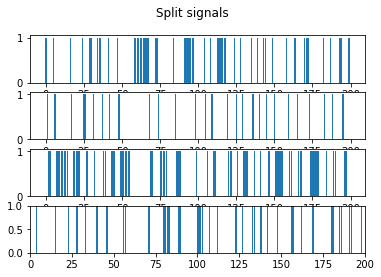

In [22]:
class split_signal:
    def __init__(self):
        self.list_zero = []
        self.list_one = []
        self.list_two = []
        self.list_three = []
    def split(self, lista):
        for i in range(len(lista)):
            if lista[i] == 0:
                self.list_zero.append(1)
            else:
                self.list_zero.append(0)
        for i in range(len(lista)):
            if lista[i] == 1:
                self.list_one.append(1)
            else:
                self.list_one.append(0)
        for i in range(len(lista)):
            if lista[i] == 2:
                self.list_two.append(1)
            else:
                self.list_two.append(0)
        for i in range(len(lista)):
            if lista[i] == 3:
                self.list_three.append(1)
            else:
                self.list_three.append(0)   
    def plots(self):
        fig, axs = plt.subplots(4)
        fig.suptitle('Split signals')
        x = np.arange(200)
        axs[0].bar(x, self.list_zero)
        axs[1].bar(x, self.list_one)
        axs[2].bar(x, self.list_two)
        axs[3].bar(x, self.list_three)
        pylab.xlim(0,200)
        pylab.ylim(0,1)
    #def burst(self):
        
        
            
split_fig2 = split_signal()
split_fig2.split(padroes_fig2)
split_fig2.plots()